In [2]:
#Referencing https://github.com/Hvass-Labs/FinanceOps/blob/master/01_Forecasting_Long-Term_Stock_Returns.ipynb
import yfinance as yf
import pandas_datareader as pdr
import datetime

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = yf.Ticker("^GSPC").history(period='max')
df = df.reindex(pd.date_range(df.index[0], df.index[-1], freq='D')).interpolate()
df[0] = (df['Close'] / df['Close'].shift(1))
df = df[1:].reset_index()[0].to_frame()

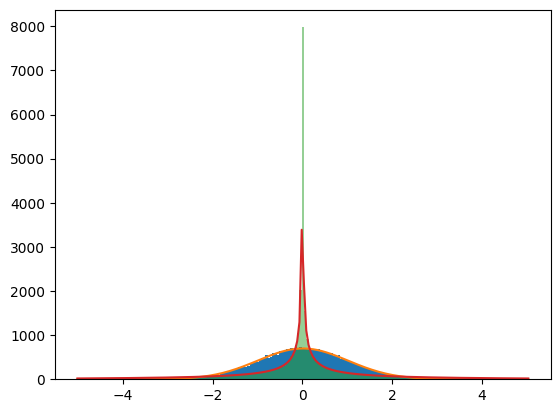

In [4]:
m = 0
sd = 1
ran = 5
bins = 200
cur = 3
sy = pd.DataFrame(np.random.normal(m, sd, len(df)))
x = np.linspace(sy.mean() - ran * sy.std(), sy.mean() + ran * sy.std(), bins)[:,0]
peak = (norm.cdf(ran * sy.std()[0] / bins, 0, sy.std()) - 0.5) * 2 * len(df)
sy1 = pd.DataFrame(np.random.choice([-1, 1], size=len(df)))

plt.hist(sy, bins=x)
plt.plot(x, norm.pdf(x, sy.mean(), sy.std()) * peak / norm.pdf(0, 0, sy.std()))

sy2 = np.abs(sy) ** cur * sy1
plt.hist(sy2, bins=x, alpha=0.5)
plt.plot(x, norm.pdf(np.abs(x) ** (1 / cur), sy.mean(), sy.std()) * np.abs(x) ** (1 / cur - 1) / cur * peak / norm.pdf(0, 0, sy.std()))

plt.show()

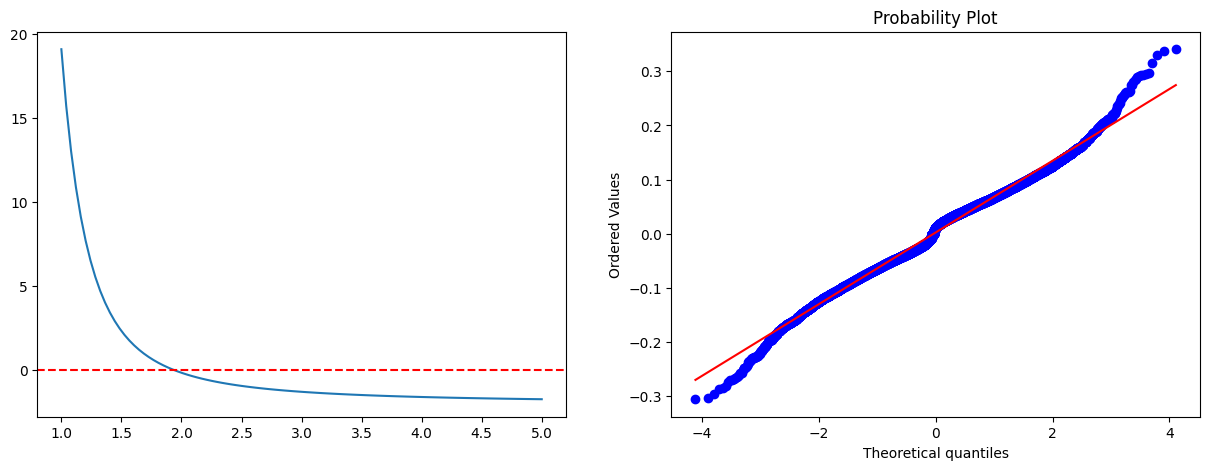

1.9292929292929295

In [50]:
from scipy.stats import skew, kurtosis, norm
kur = []
for i in np.linspace(1, 5, 100):
    kur.append([i, kurtosis(np.abs(df[0] - 1) ** (1/i) * (2 * ((df[0] - 1) > 0) - 1))])


plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(np.array(kur)[:,0], np.array(kur)[:,1])
plt.axhline(y=0, color='r', linestyle='--', label='Horizontal Line at y=7')

plt.subplot(1, 2, 2)
c = np.array(kur)[:,0][np.where(np.abs(np.array(kur)[:,1]) == np.abs(np.array(kur)[:,1]).min())[0][0]]
import scipy.stats as stats
stats.probplot(np.abs(df[0] - 1) ** (1/c) * (2 * ((df[0] - 1) > 0) - 1), dist=stats.norm, plot=plt)

plt.show()
c


In [111]:
def profit(ret, strat):
    return ret[strat].product() / ret[~strat].product()

In [144]:
s = []
for i in range(100000):
    s.append(profit(df, pd.Series(np.random.randint(0, 2, len(df))).astype('bool'))[0])

In [179]:
sy = pd.DataFrame(np.random.normal(0, 1, len(df)))
ss = []
for i in range(100000):
    ss.append(profit(sy, pd.Series(np.random.randint(0, 2, len(df))).astype('bool'))[0])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


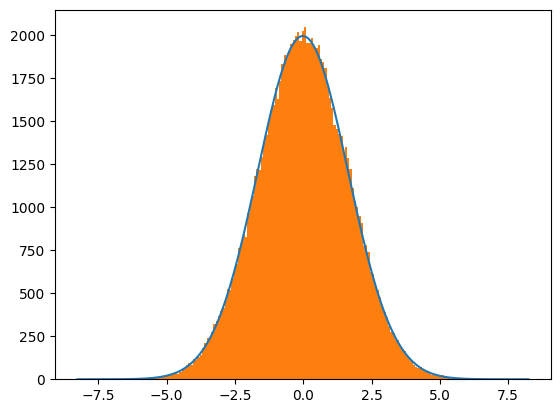

In [180]:
S = np.log(np.array(s))
SS = np.log(np.array(ss))
sy = pd.DataFrame(np.random.normal(S.mean(), S.std(), len(S)))

ran = 5
bins = 200
x = np.linspace(sy.mean() - ran * sy.std(), sy.mean() + ran * sy.std(), bins)[:,0]
peak = (norm.cdf(ran * sy.std()[0] / bins, 0, sy.std()) - 0.5) * 2 * len(S)
plt.plot(x, norm.pdf(x, sy.mean(), sy.std()) * peak / norm.pdf(0, 0, sy.std()))
plt.hist(S, bins=x)
plt.hist(SS, bins=x)
plt.show()

In [177]:
np.log(profit(df, df[0] != 0))

0    5.521515
dtype: float64